In [1]:
! pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset

online-payments-fraud-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip /content/online-payments-fraud-detection-dataset.zip

Archive:  /content/online-payments-fraud-detection-dataset.zip
replace PS_20174392719_1491204439457_log.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.shape

(6362620, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
print(df.type.value_counts())
print(df['isFlaggedFraud'].value_counts())
print(df['isFraud'].value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64
0    6362604
1         16
Name: isFlaggedFraud, dtype: int64
0    6354407
1       8213
Name: isFraud, dtype: int64


<ipython-input-14-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

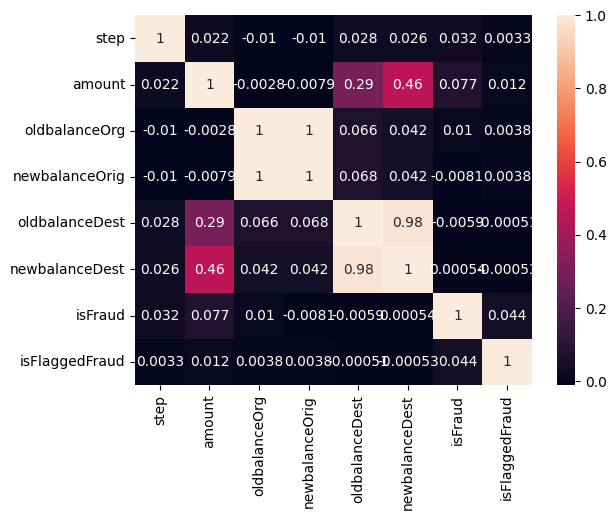

In [14]:
sns.heatmap(df.corr(),annot=True)

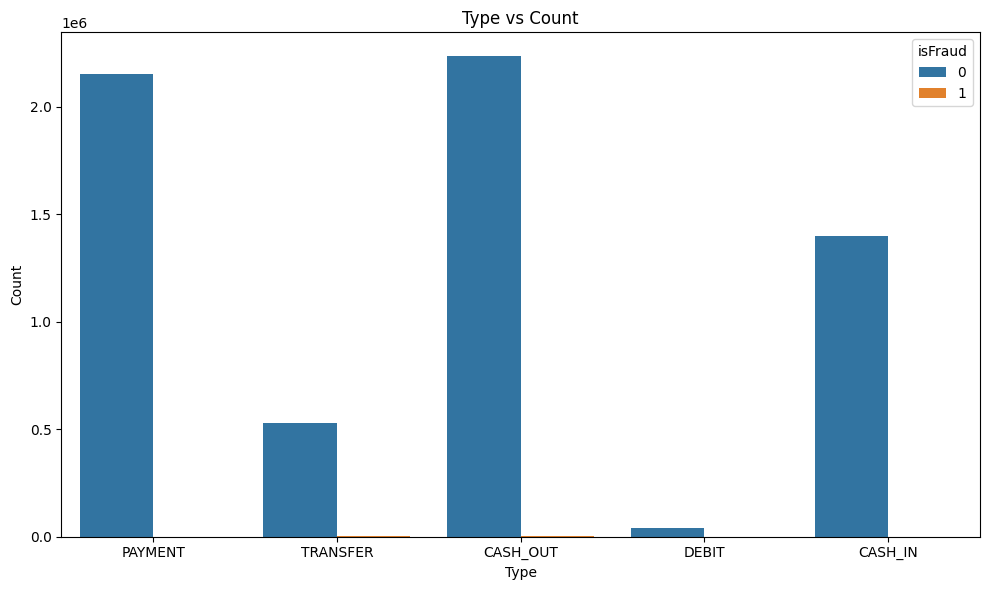

In [15]:
plt.figure(figsize=(10, 6))
plt.title("Type vs Count")
sns.countplot(data=df,x="type",hue="isFraud")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

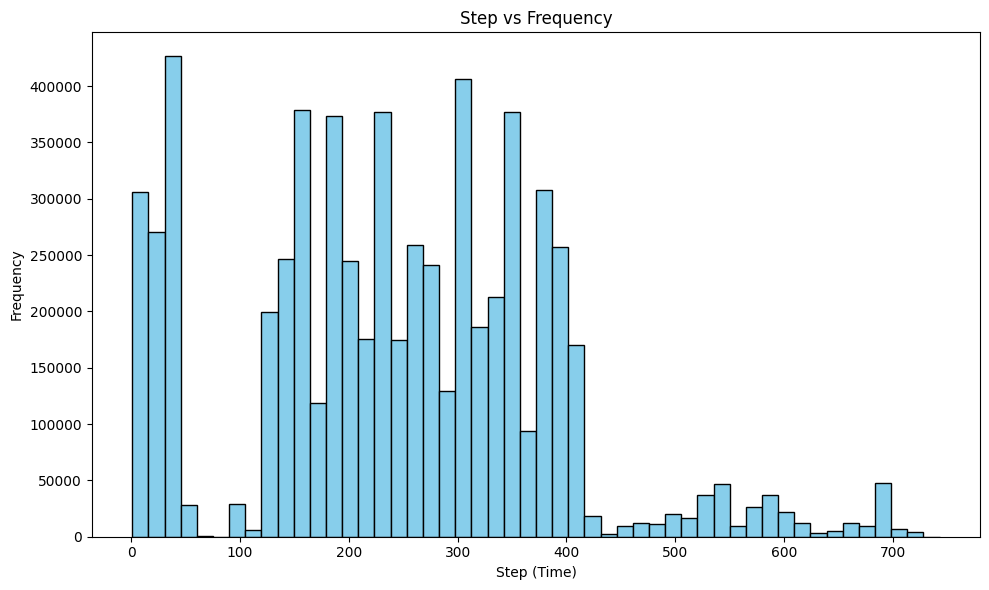

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['step'],bins=50,color='skyblue',edgecolor='black')
plt.title("Step vs Frequency")
plt.xlabel("Step (Time)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

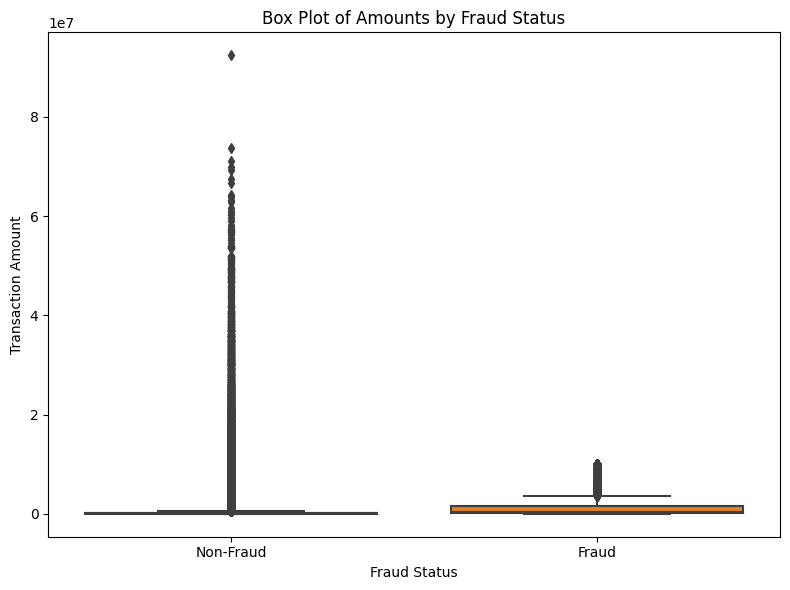

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='isFraud', y='amount')
plt.title("Box Plot of Amounts by Fraud Status")
plt.xlabel("Fraud Status")
plt.ylabel("Transaction Amount")
plt.xticks([0, 1], labels=["Non-Fraud", "Fraud"])
plt.tight_layout()
plt.show()

In [18]:
df.drop('isFlaggedFraud',axis=1,inplace=True)

<ipython-input-19-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

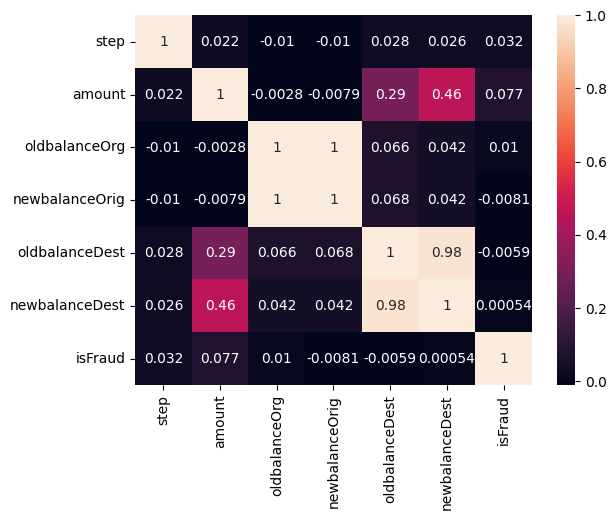

In [19]:
sns.heatmap(df.corr(),annot=True)

In [20]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

<Axes: xlabel='step'>

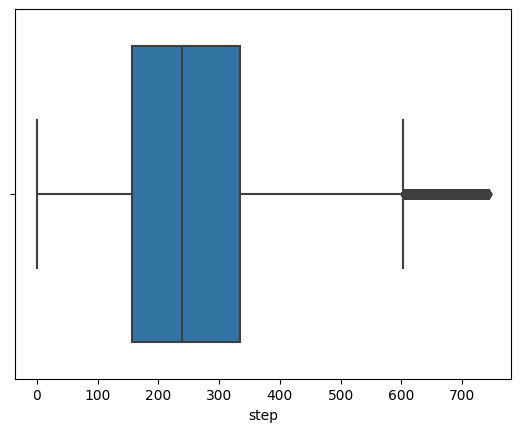

In [21]:
sns.boxplot(df,x='step')

<Axes: xlabel='type', ylabel='count'>

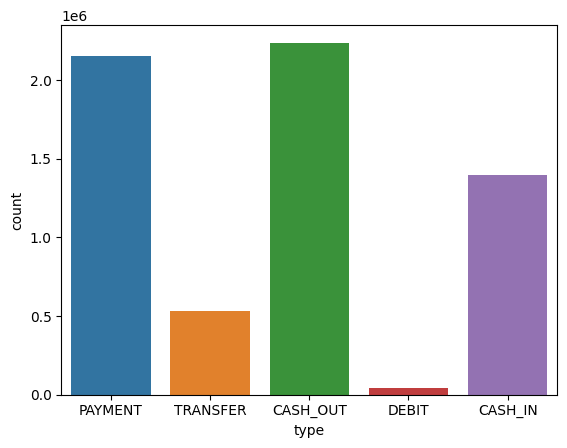

In [22]:
sns.countplot(df,x="type")

<Axes: xlabel='amount', ylabel='Count'>

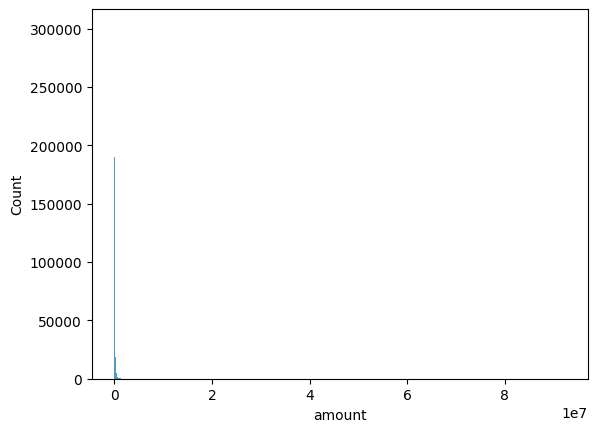

In [23]:
sns.histplot(df,x="amount")

<Axes: xlabel='amount'>

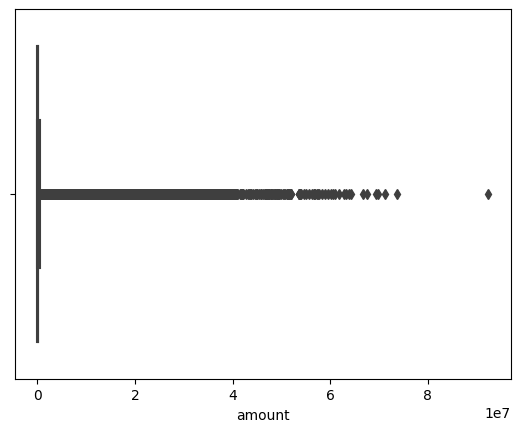

In [24]:
sns.boxplot(df,x="amount")

In [25]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [26]:
#df.loc[df["isFraud"]==0,"isFraud"]="is not fraud"
#df.loc[df["isFraud"]==1,"isFraud"]="is fraud"

In [27]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


<Axes: xlabel='type', ylabel='count'>

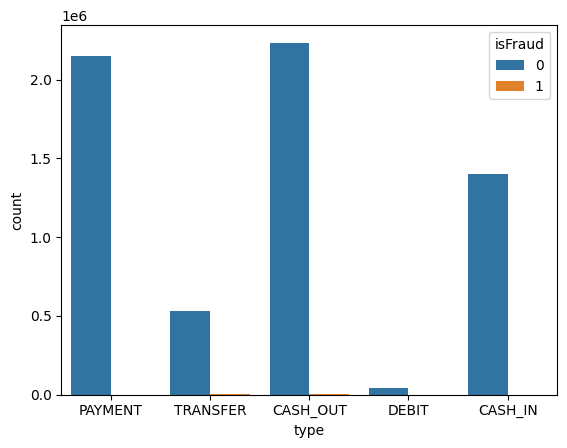

In [28]:
sns.countplot(data=df,x='type',hue="isFraud")

In [29]:
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)
df_encoded.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0


<Axes: >

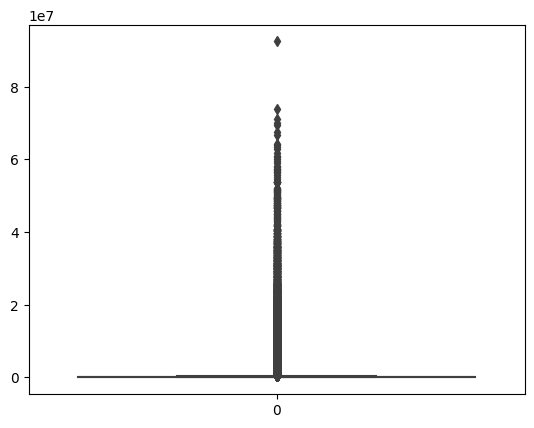

In [30]:
sns.boxplot(df['amount'])

In [31]:

q1 = df.amount.quantile(0.25) #Q1
q3 = df.amount.quantile(0.75) #Q3

In [32]:
IQR = q3-q1

In [33]:
upper_limit = q3+1.5*IQR

In [34]:
lower_limit =q1-1.5*IQR


In [35]:

df.median()

<ipython-input-35-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


step                 239.000
amount             74871.940
oldbalanceOrg      14208.000
newbalanceOrig         0.000
oldbalanceDest    132705.665
newbalanceDest    214661.440
isFraud                0.000
dtype: float64

In [36]:

df['amount'] = np.where(df['amount']>upper_limit,74871.940,df['amount'])

<Axes: >

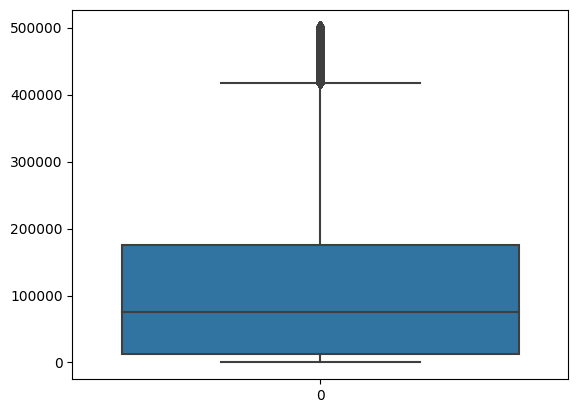

In [37]:
sns.boxplot(df['amount'])

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [39]:
df['type']=le.fit_transform(df['type'])


In [40]:
df.drop(['nameOrig','nameDest'], axis = 1, inplace = True)

In [41]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [42]:
x=df.drop('isFraud',axis=1)
y=df['isFraud']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
x_train.shape

(5090096, 7)

In [46]:
x_test.shape

(1272524, 7)

In [47]:
y_test.head()

4644207    0
3800666    0
4426240    0
5788765    0
2010701    0
Name: isFraud, dtype: int64

In [48]:
from sklearn.tree import DecisionTreeClassifier


In [49]:

model1 = DecisionTreeClassifier(max_depth=6,splitter='best',criterion='entropy')

In [50]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [51]:
y_predict = model1.predict(x_test)

In [52]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
y_predict_train = model1.predict(x_train)

In [54]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [55]:
print('Testing Accuracy = ', accuracy_score(y_test,y_predict))
print('Training Accuracy = ', accuracy_score(y_train,y_predict_train))

Testing Accuracy =  0.9995976500246754
Training Accuracy =  0.9995905774665154


In [56]:
pd.crosstab(y_test,y_predict)

col_0,0,1
isFraud,,
0,1270848,35
1,477,1164


In [57]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.97      0.71      0.82      1641

    accuracy                           1.00   1272524
   macro avg       0.99      0.85      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



Random forest classifier


In [58]:
from sklearn.ensemble import RandomForestClassifier
model2 =RandomForestClassifier(criterion='entropy')

In [59]:
model2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [60]:
z_predict=model2.predict(x_test)

z_predict_train = model2.predict(x_train)

In [61]:
print('Testing Accuracy = ', accuracy_score(y_test,z_predict))
print('Training Accuracy = ', accuracy_score(y_train,z_predict_train))


Testing Accuracy =  0.9997139543144177
Training Accuracy =  0.9999994106201533


In [62]:

pd.crosstab(y_test,z_predict)


col_0,0,1
isFraud,,
0,1270854,29
1,335,1306


In [63]:

print(classification_report(y_test,z_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.98      0.80      0.88      1641

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



SVM

In [64]:
from sklearn.svm import SVC


In [65]:
model3=SVC()

In [66]:
model3.fit(x_train,y_train)

SVC()

In [67]:
s_pred = model3.predict(x_test)
s_pred_train = model3.predict(x_train)

In [68]:
print("Test accuracy", accuracy_score(y_test,s_pred))
print("Train accuracy", accuracy_score(y_train,s_pred_train))


Test accuracy 0.999177225734053
Train accuracy 0.9991909779304752


In [69]:
pd.crosstab(y_test,s_pred)

col_0,0,1
isFraud,,
0,1270875,8
1,1039,602


XG boost

In [70]:
import xgboost as xgb

In [71]:
model4=xgb.XGBClassifier()

In [72]:
model4.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
x_pred=model4.predict(x_test)
x_pred_train=model4.predict(x_train)

In [74]:
print("Test accuracy", accuracy_score(y_test,x_pred))
print("Train accuracy", accuracy_score(y_train,x_pred_train))

Test accuracy 0.9997744639786754
Train accuracy 0.9998538337980266


In [75]:
pd.crosstab(y_test,x_pred)

col_0,0,1
isFraud,,
0,1270827,56
1,231,1410


In [76]:
import pickle


In [79]:
pickle.dump(model4,open('Model_deployment.pkl','wb'))